<a href="https://colab.research.google.com/github/yujiunzou/BA820-Unsupervised-ML-Project/blob/Tzu-Jen(Stephanie)Chen/Bob_Ross_Paintings_M2_Tzu_Jen(Stephanie)Chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Exploring Latent Color Patterns and Similarity in Bob Ross Paintings**

Team ID: B1 Team 3

Name: Tzu-Jen(Stephanie) Chen

##**EDA & Preprocessing**

##0.Load and Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

##1.Data Overview

In [3]:
print(f"Dataset size: {bob_ross.shape}")
print("\nColumn types:")

display(bob_ross.head())

Dataset size: (403, 27)

Column types:


,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [4]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

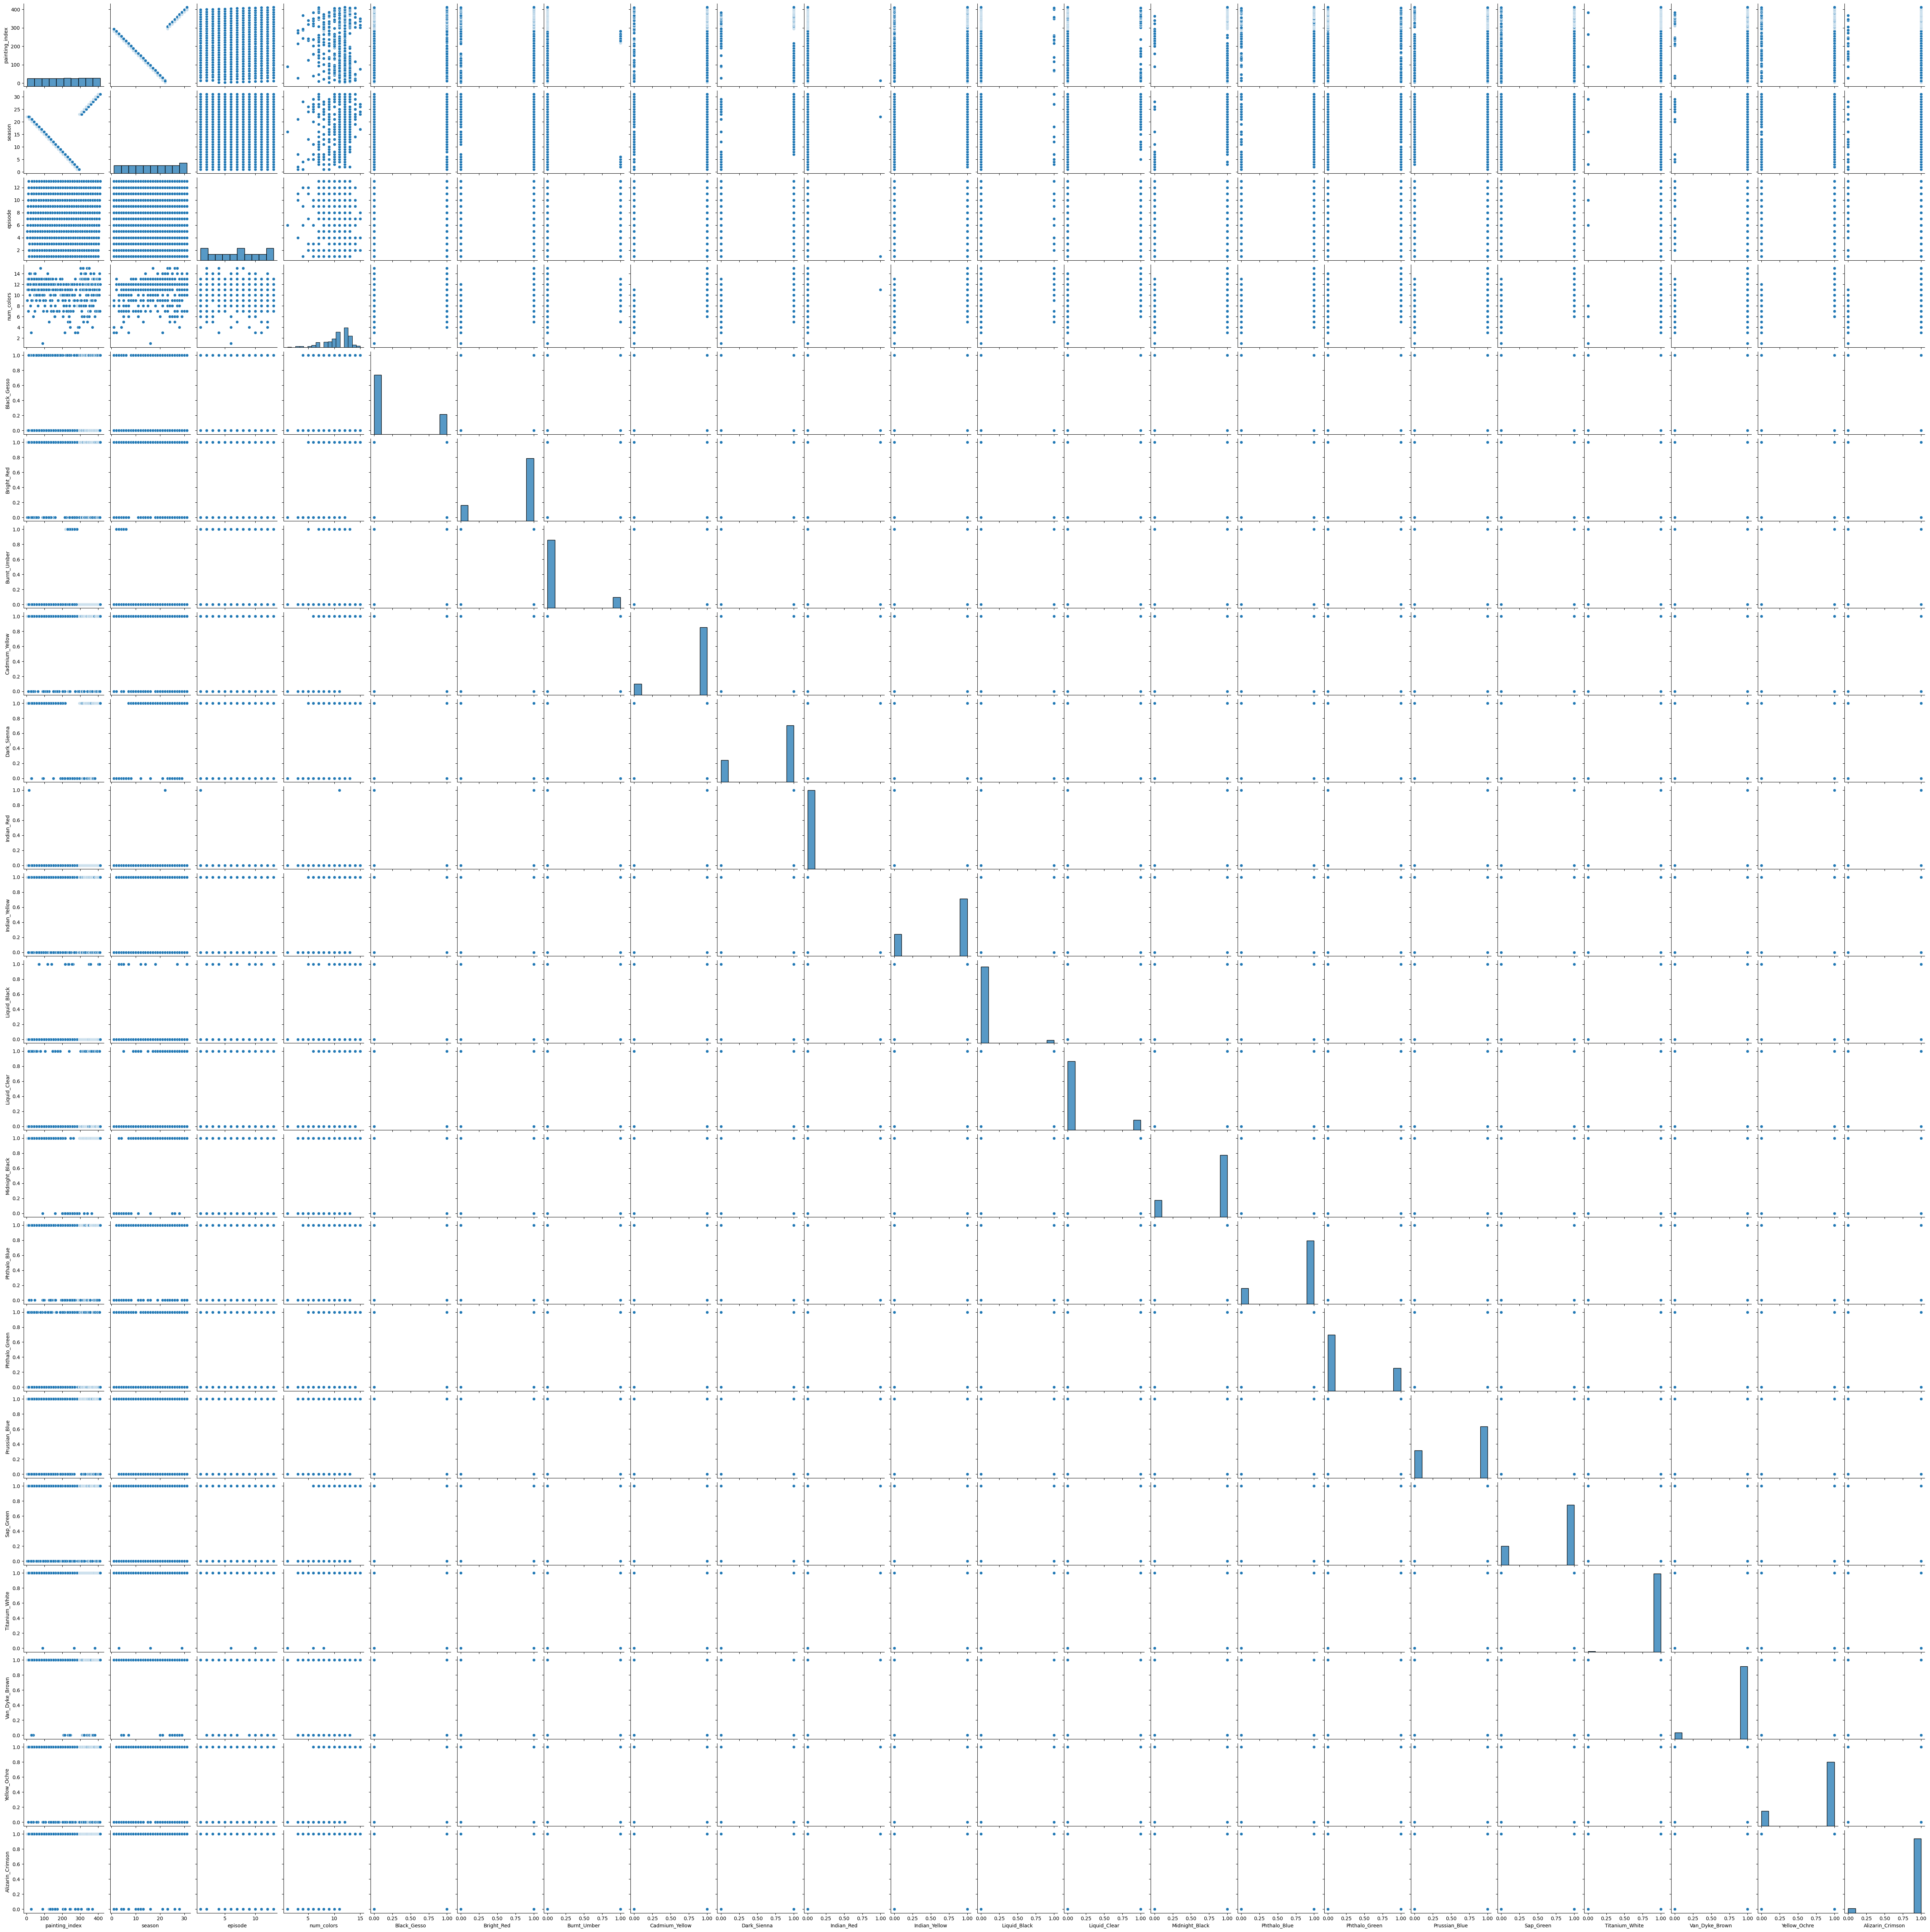

In [5]:
sns.pairplot(bob_ross)

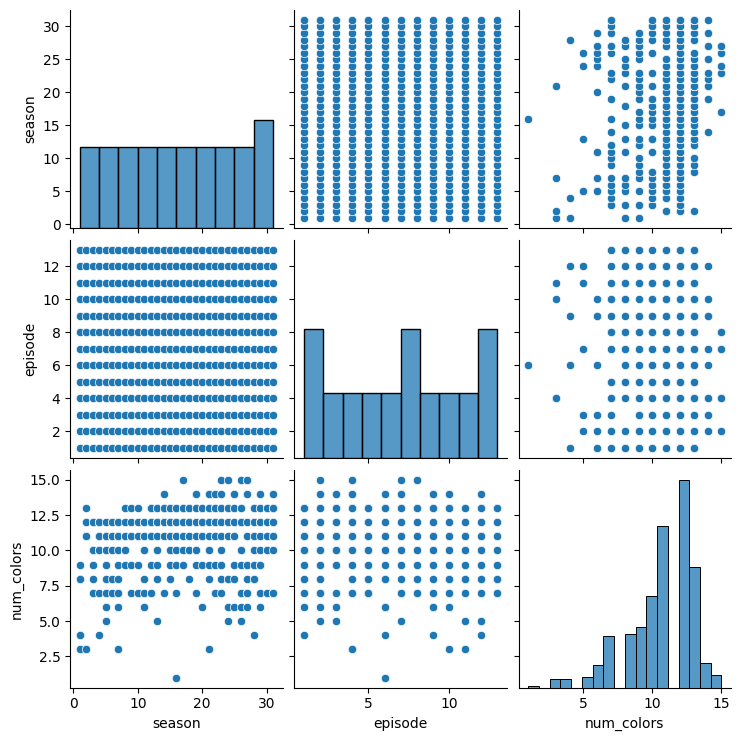

In [6]:
# Show small group
num_small = bob_ross[["season","episode","num_colors"]].copy()

sns.pairplot(num_small)
plt.show()

The pairplot shows that the number of colors used in Bob Ross paintings is fairly consistent across seasons and episodes, with no stong temporal trend. This suggests that painting complexity is not driven by time but by artistic style.

##2.Checking for Missing Values and Duplicates

###2.1 Missing Values

In [7]:
if "colors_list" in bob_ross.columns:
    bob_ross = bob_ross.drop(columns=["colors_list"])
if "hex_list" in bob_ross.columns:
    bob_ross = bob_ross.drop(columns=["hex_list"])

# Missing Values
missing = bob_ross.isna().sum()
print("Total missing cells:", int(missing.sum()))

missing_cols = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:")
if len(missing_cols) == 0:
    print("No missing values.")
else:
    display(missing_cols)

Total missing cells: 0
Columns with missing values:
No missing values.


We checked missing values across all columns and the output shows no missing values.

###2.2 Duplicates

In [8]:
# Duplicates
dup_painting_index = bob_ross["painting_index"].duplicated().sum()
print("Duplicate painting_index:", dup_painting_index)

dup_season_episode = bob_ross.duplicated(subset=["season", "episode"]).sum()
print("Duplicate (season, episode):", dup_season_episode)

if dup_season_episode > 0:
    dup_rows = bob_ross[bob_ross.duplicated(subset=["season","episode"], keep=False)]
    display(dup_rows[["painting_index","season","episode","painting_title"]].sort_values(["season","episode"]))

Duplicate painting_index: 0
Duplicate (season, episode): 0


We checked duplicates using two identifiers. Painting_index and the natural key (season, episode). The results show no duplicates.

###2.3 Range Checks

In [9]:
# Range Checks
print("season min/max:", bob_ross["season"].min(), bob_ross["season"].max())
print("episode min/max:", bob_ross["episode"].min(), bob_ross["episode"].max())
print("num_colors min/max:", bob_ross["num_colors"].min(), bob_ross["num_colors"].max())

display(bob_ross[["season","episode","num_colors"]].describe())

season min/max: 1 31
episode min/max: 1 13
num_colors min/max: 1 15


,season,episode,num_colors
count,403.00000,403.000000,403.000000
mean,16.00000,7.000000,10.605459
std,8.95539,3.746308,2.378525
min,1.00000,1.000000,1.000000
25%,8.00000,4.000000,9.000000
50%,16.00000,7.000000,11.000000
75%,24.00000,10.000000,12.000000
max,31.00000,13.000000,15.000000


##3.Variable Exploration

###3.1 Summary statistics

In [10]:
# Summary Statistics
print("Summary statistics of num_colors:")
display(bob_ross["num_colors"].describe())

Summary statistics of num_colors:


,num_colors
count,403.000000
mean,10.605459
std,2.378525
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,15.000000


###3.2 Distribution

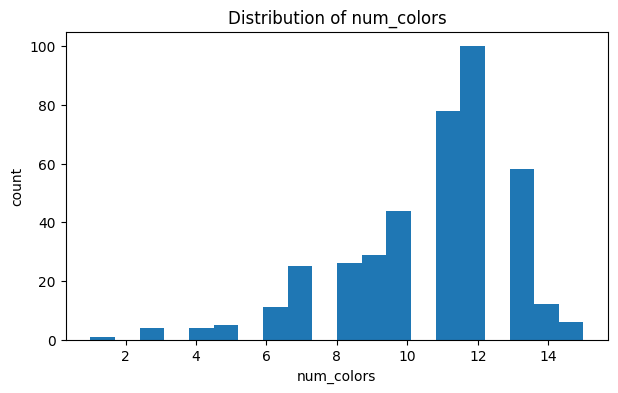

In [11]:
# Distribution of num_colors
plt.figure(figsize=(7,4))
plt.hist(bob_ross["num_colors"], bins=20)
plt.title("Distribution of num_colors")
plt.xlabel("num_colors")
plt.ylabel("count")
plt.show()

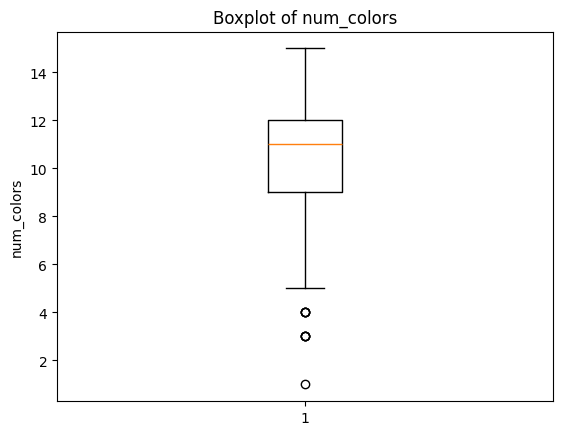

In [12]:
plt.figure()
plt.boxplot(bob_ross["num_colors"].dropna())
plt.title("Boxplot of num_colors")
plt.ylabel("num_colors")
plt.show()


The distribution of colors shows that most paintings use a moderate number of colors (9-13), indicating a consistent of visual complexity across works.

The boxplot shows that hte number of colors used in the paintings is tightly concentrated around the median, with only a few outliers.

###3.3 Extremes

In [13]:
# show extremes
min_row = bob_ross.loc[bob_ross["num_colors"].idxmin(), ["painting_title","season","episode","num_colors"]]
max_val = bob_ross["num_colors"].max()
max_rows = bob_ross.loc[bob_ross["num_colors"] == max_val, ["painting_title","season","episode","num_colors"]]

print("Min num_colors example:")
display(min_row.to_frame().T)

print("Max num_colors examples (first 10):")
display(max_rows.head(10))

Min num_colors example:


,painting_title,season,episode,num_colors
200,Contemplative Lady,16,6,1


Max num_colors examples (first 10):


,painting_title,season,episode,num_colors
214,Spectacular Waterfall,17,7,15
293,Valley Waterfall,23,8,15
306,Graceful Waterfall,24,8,15
328,Lake in the Valley,26,4,15
339,Angler's Haven,27,2,15
341,Wilderness Falls,27,4,15


Extreme cases shows that paintings with very few colors are rare, while paintings with the maximum number of colors tend to be more complex, this suggests that it captures the differences in painting style rather than random variation.

Several high number of colors paintings have related to natural secnes such as waterfalls or landscpes, suggesting that visually rich scenes may be associated with higher color usage.

##4.Identify Paint Indicator Columns and Imbalance

In [14]:
paint_bool_cols = bob_ross.select_dtypes(include=["bool"]).columns.tolist()
print("Number of boolean paint columns:", len(paint_bool_cols))
print("Example paint columns:", paint_bool_cols[:8])

X_paint_df = bob_ross[paint_bool_cols].astype(int)

X_paint_mat = X_paint_df.to_numpy(dtype=bool)

Number of boolean paint columns: 18
Example paint columns: ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black']


In [15]:
exclude = {"painting_index","img_src","painting_title","season","episode","num_colors",
           "youtube_src","colors","color_hex"}

paint_like_cols = []
for c in bob_ross.columns:
    if c in exclude:
        continue
    if bob_ross[c].dtype == bool:
        paint_like_cols.append(c)
    else:
        vals = set(bob_ross[c].dropna().unique())
        if vals.issubset({0, 1}):
            paint_like_cols.append(c)

print("Number of paint-like columns:", len(paint_like_cols))

Number of paint-like columns: 18


The dataset contains 18 binary paint indicator columns, each representing whether a specific color is used in a painting.

In [16]:
X = bob_ross[paint_like_cols].copy()

for c in paint_like_cols:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)

usage_rate = X.mean().sort_values(ascending=False)

print("Top 10 most used paints:")
display(usage_rate.head(10))

print("Bottom 10 least used paints:")
display(usage_rate.tail(10))

Top 10 most used paints:


,0
Titanium_White,0.992556
Alizarin_Crimson,0.942928
Van_Dyke_Brown,0.920596
Cadmium_Yellow,0.858561
Yellow_Ochre,0.811414
Phthalo_Blue,0.801489
Bright_Red,0.796526
Midnight_Black,0.786600
Sap_Green,0.759305
Indian_Yellow,0.724566


Bottom 10 least used paints:


,0
Sap_Green,0.759305
Indian_Yellow,0.724566
Dark_Sienna,0.719603
Prussian_Blue,0.652605
Phthalo_Green,0.287841
Black_Gesso,0.250620
Burnt_Umber,0.136476
Liquid_Clear,0.126551
Liquid_Black,0.034739
Indian_Red,0.002481


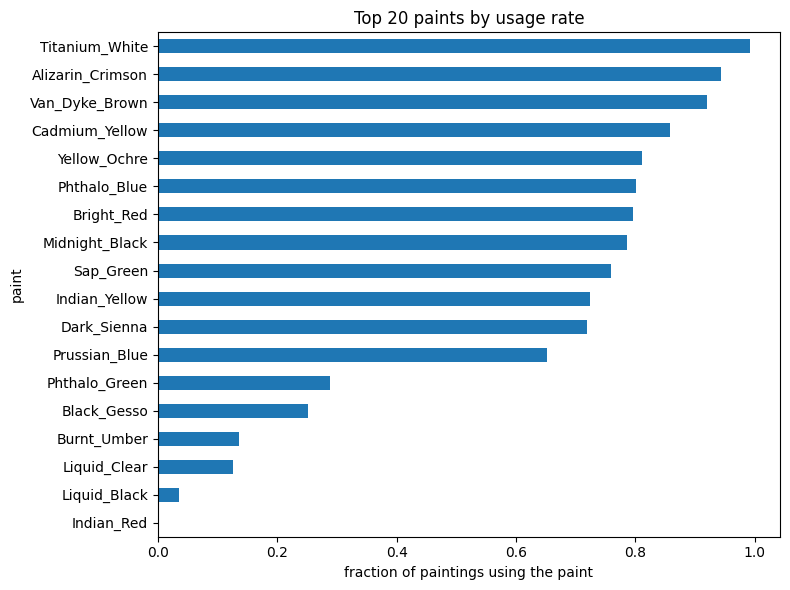

In [17]:
# Plot top 20 usage rates
topN = 20
plt.figure(figsize=(8,6))
usage_rate.head(topN).sort_values().plot(kind="barh")
plt.title(f"Top {topN} paints by usage rate")
plt.xlabel("fraction of paintings using the paint")
plt.ylabel("paint")
plt.tight_layout()
plt.show()

Paint usage is also highly imbalanced across the 18 indicators, where a small set of core paints appears in nearly all paintings, most notably Titanium White (0.9926), Alizarin Crimson (0.9429), and Van Dyke Brown (0.9206).

##5.Season patterns

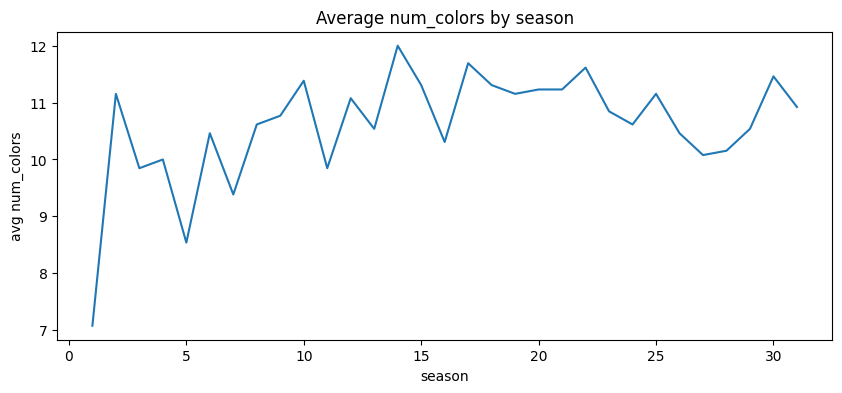

In [18]:
season_mean = bob_ross.groupby("season")["num_colors"].mean()

plt.figure(figsize=(10,4))
plt.plot(season_mean.index, season_mean.values)
plt.title("Average num_colors by season")
plt.xlabel("season")
plt.ylabel("avg num_colors")
plt.show()

The average number of colors per painting increases silghty and becomes more stable across later seasons. This suggests that Bob Ross's painting style converged to a consistent level of color complexity over time.

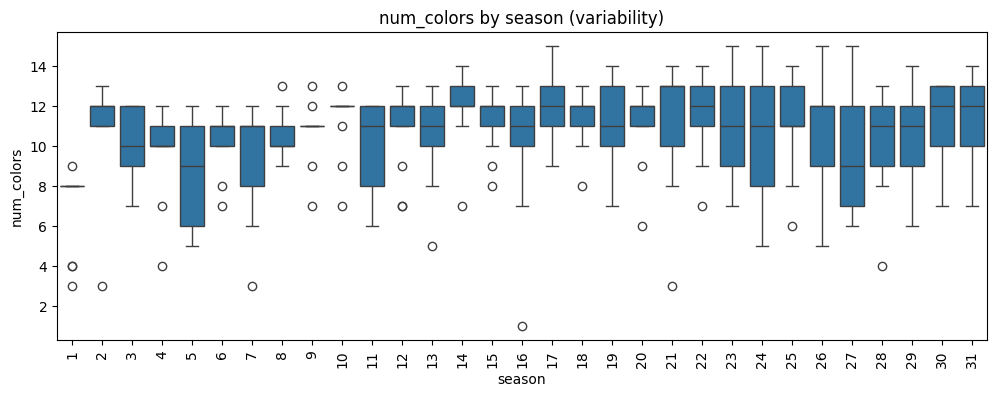

In [19]:
plt.figure(figsize=(12,4))
sns.boxplot(x="season", y="num_colors", data=bob_ross)
plt.title("num_colors by season (variability)")
plt.xticks(rotation=90)
plt.show()

This boxplot shows that while the average number of colors per painting is relatively stable across seasons, some seasons show much greater variation.

Later seasons show reduced extremely low color counts, but greater spread among mediun to high color usage, suggesting that paintings become consistently more complex while still varies between paintings.

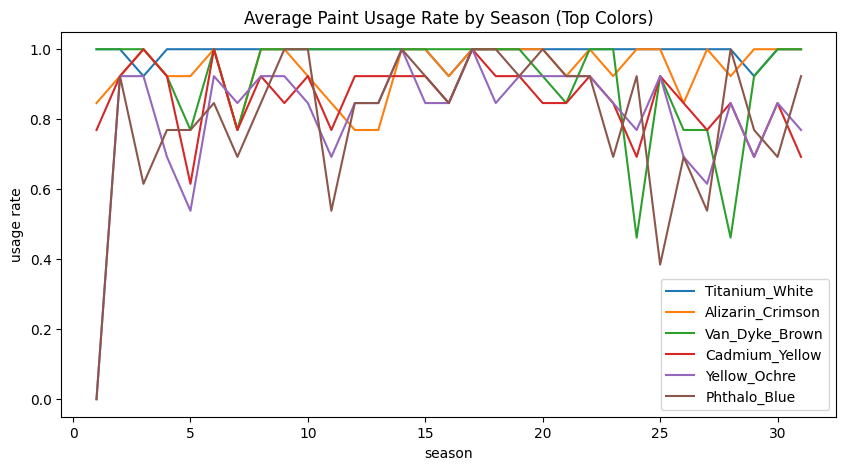

In [20]:
top_paints = usage_rate.head(6).index.tolist()
season_paint = X.join(bob_ross["season"]).groupby("season")[top_paints].mean()

plt.figure(figsize=(10,5))
for c in top_paints:
    plt.plot(season_paint.index, season_paint[c], label=c)
plt.title("Average Paint Usage Rate by Season (Top Colors)")
plt.xlabel("season")
plt.ylabel("usage rate")
plt.legend()
plt.show()


The most frequently used paints maintain consistently high usage rates across seasons, showing a stable core palette in Bob Ross's paintings, while a smaller number of colors reflect seasonal fluctuations.

The coexistence of stable and variable paint usage suggests both core features and seasons-dependent variation in painting styles, making it suitable for futher clustering.



##6.Co-occurrence

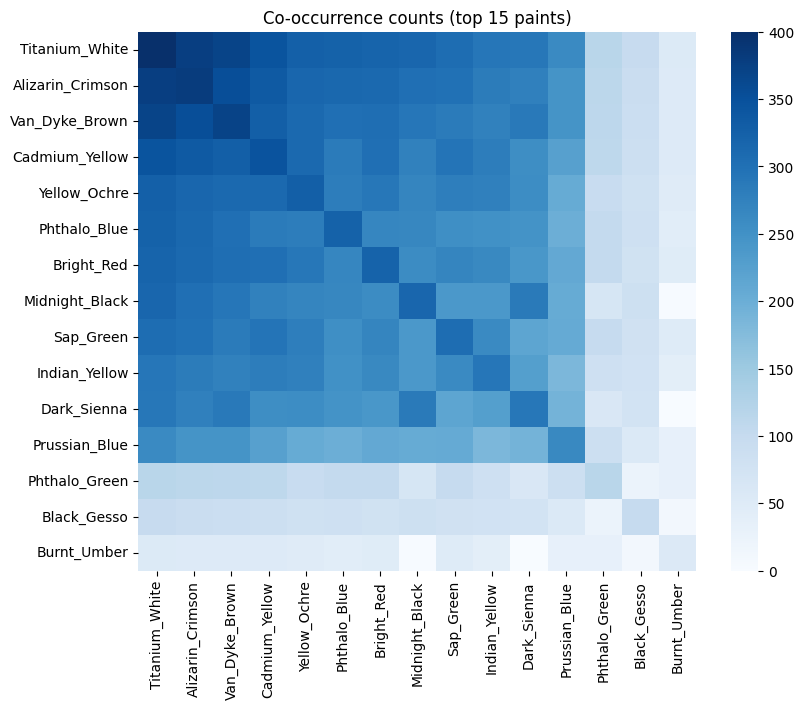

In [21]:
co = X.T.dot(X)

topM = 15
top_list = usage_rate.head(topM).index.tolist()
co_top = co.loc[top_list, top_list]

plt.figure(figsize=(9,7))
sns.heatmap(co_top, cmap="Blues")
plt.title(f"Co-occurrence counts (top {topM} paints)")
plt.show()

In [22]:
pairs = []
for i in range(len(top_list)):
    for j in range(i+1, len(top_list)):
        a = top_list[i]
        b = top_list[j]
        pairs.append([a, b, int(co.loc[a, b])])

pairs_df = pd.DataFrame(pairs, columns=["paint_a","paint_b","co_count"])
pairs_df = pairs_df.sort_values("co_count", ascending=False)

print("Top 15 co-occurring paint pairs:")
display(pairs_df.head(15))

Top 15 co-occurring paint pairs:


,paint_a,paint_b,co_count
0,Titanium_White,Alizarin_Crimson,378
1,Titanium_White,Van_Dyke_Brown,369
14,Alizarin_Crimson,Van_Dyke_Brown,354
2,Titanium_White,Cadmium_Yellow,345
15,Alizarin_Crimson,Cadmium_Yellow,335
27,Van_Dyke_Brown,Cadmium_Yellow,327
3,Titanium_White,Yellow_Ochre,326
4,Titanium_White,Phthalo_Blue,323
5,Titanium_White,Bright_Red,319
16,Alizarin_Crimson,Yellow_Ochre,317


The co-occurrence heatmap reveals overall grouping patterns among paints, with the top co-occurrence paint pairs table highlights the exact paint pairs that drive those patterns, suggesting systematic combinations rather than independent choices.

##7.Similarity

###7.1 Similarity Distribution

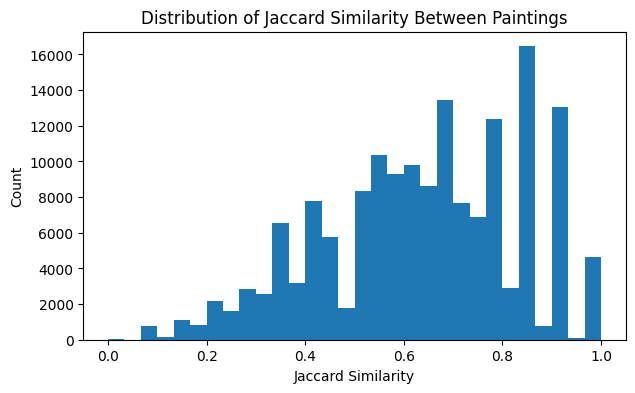

In [23]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D = pairwise_distances(X_paint_mat, metric="jaccard")
S = 1 - D

np.fill_diagonal(S, np.nan)
sim_vals = S[~np.isnan(S)].ravel()

plt.figure(figsize=(7,4))
plt.hist(sim_vals, bins=30)
plt.title("Distribution of Jaccard Similarity Between Paintings")
plt.xlabel("Jaccard Similarity")
plt.ylabel("Count")
plt.show()

In [24]:
print("Similarity summary:")
print(pd.Series(sim_vals).describe())

Similarity summary:
count    162006.000000
mean          0.634615
std           0.200912
min           0.000000
25%           0.500000
50%           0.642857
75%           0.785714
max           1.000000
dtype: float64


The similarity distribution shows that most paintings share a moderate to high level of paint overlap, and the most common exact paint recipe appears in dozens of paintings. This pattern indicates a consistent core palette across Bob Ross's work.

This similarity structure motivate the use of clustering methods to identify goups of paintings with similar color palettes.

###7.2 Nearest Neighbors

In [25]:
meta_cols = ["painting_index", "season", "episode", "painting_title", "num_colors"]
meta_cols = [c for c in meta_cols if c in bob_ross.columns]

def topk_neighbors(i, k=5, S_mat=None):
    sims = S_mat[i].copy()
    sims[i] = -np.inf
    nn_idx = np.argsort(sims)[-k:][::-1]
    return nn_idx, sims[nn_idx]

example_i = 2
nn_idx, nn_sim = topk_neighbors(example_i, k=5, S_mat=S)

print("Query painting:")
display(bob_ross.loc[[example_i], meta_cols])

Query painting:


,painting_index,season,episode,painting_title,num_colors
2,284,1,3,Ebony Sunset,9


In [26]:
neighbors = bob_ross.loc[nn_idx, meta_cols].copy()
neighbors["jaccard_similarity"] = nn_sim
print("Top-5 nearest neighbors:")
display(neighbors)

Top-5 nearest neighbors:


,painting_index,season,episode,painting_title,num_colors,jaccard_similarity
0,282,1,1,A Walk in the Woods,8,0.888889
12,294,1,13,Final Reflections,8,0.888889
7,289,1,8,Peaceful Valley,8,0.888889
6,288,1,7,Autumn Mountain,8,0.888889
4,286,1,5,Quiet Stream,8,0.888889


We compute Jaccard similarity between paintings based on paint usage and retrieve the top-k nearest neighbors for a selected painting.

The nearest neighbors of the query painting show very high Jaccard similarity and similar palette sizes, indicating that paintings using nearly identical sets of paints are correctly idetified as similar.

###7.3 Near-duplicates

In [27]:
n = len(bob_ross)
pairs = []

for i in range(n):
    for j in range(i+1, n):
        pairs.append((i, j, S[i, j]))

pairs_df = pd.DataFrame(pairs, columns=["i", "j", "jaccard_similarity"]).sort_values(
    "jaccard_similarity", ascending=False
)

print("Top 20 most similar pairs:")
display(pairs_df.head(20))

threshold = 0.95
near_dup = pairs_df[pairs_df["jaccard_similarity"] >= threshold]
print(f"Number of pairs with similarity >= {threshold}: {len(near_dup)}")
display(near_dup.head(20))

Top 20 most similar pairs:


,i,j,jaccard_similarity
70531,257,371,1.0
70528,257,368,1.0
70664,258,360,1.0
70516,257,356,1.0
70513,257,353,1.0
70511,257,351,1.0
70496,257,336,1.0
70492,257,332,1.0
70487,257,327,1.0
70479,257,319,1.0


Number of pairs with similarity >= 0.95: 2330


,i,j,jaccard_similarity
70531,257,371,1.0
70528,257,368,1.0
70664,258,360,1.0
70516,257,356,1.0
70513,257,353,1.0
70511,257,351,1.0
70496,257,336,1.0
70492,257,332,1.0
70487,257,327,1.0
70479,257,319,1.0


In [28]:
recipe_sizes = (
    bob_ross.groupby(paint_bool_cols, dropna=False)
            .size()
            .sort_values(ascending=False)
            .reset_index(name="n_paintings")
)

print("Top 10 most common exact paint recipes:")
display(recipe_sizes.head(10))

top_recipe = recipe_sizes.loc[0, paint_bool_cols].to_dict()

mask = np.ones(len(bob_ross), dtype=bool)
for c in paint_bool_cols:
    mask &= (bob_ross[c] == top_recipe[c])

meta_cols = ["painting_index", "season", "episode", "painting_title", "num_colors"]
meta_cols = [c for c in meta_cols if c in bob_ross.columns]

print("Paintings using the most common recipe:")
display(bob_ross.loc[mask, meta_cols].sort_values(["season", "episode"]))

Top 10 most common exact paint recipes:


,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson,n_paintings
0,False,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True,46
1,False,True,False,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True,32
2,False,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True,24
3,True,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True,17
4,False,True,False,True,True,False,True,False,False,True,False,False,True,True,True,True,True,True,14
5,False,True,True,True,False,False,True,False,False,False,True,True,True,True,True,True,True,True,13
6,True,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True,9
7,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True,9
8,False,True,True,True,False,False,True,False,False,False,True,True,False,True,True,True,True,True,8
9,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,True,False,True,7


Paintings using the most common recipe:


,painting_index,season,episode,painting_title,num_colors
118,164,10,2,Cabin at Sunset,12
119,165,10,3,Twin Falls,12
120,166,10,4,Secluded Bridge,12
122,168,10,6,Autumn Woods,12
127,174,10,11,Triple View,12
129,176,10,13,Lakeside Cabin,12
130,150,11,1,Mountain Stream,12
133,153,11,4,Hidden Stream,12
136,156,11,7,Lakeside Path,12
144,138,12,2,Mountain Reflections,12


In [29]:
cols = ["n_paintings"] + paint_bool_cols
display(recipe_sizes[cols].head(10))

,n_paintings,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,46,False,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True
1,32,False,True,False,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True
2,24,False,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True
3,17,True,True,False,True,True,False,True,False,False,True,True,False,False,True,True,True,True,True
4,14,False,True,False,True,True,False,True,False,False,True,False,False,True,True,True,True,True,True
5,13,False,True,True,True,False,False,True,False,False,False,True,True,True,True,True,True,True,True
6,9,True,True,False,True,True,False,True,False,False,True,True,False,True,True,True,True,True,True
7,9,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True
8,8,False,True,True,True,False,False,True,False,False,False,True,True,False,True,True,True,True,True
9,7,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,True,False,True


##**Analyze Domain Question**
Although most Bob Ross paintings use a very similar set of core colors, do these patterns correspond to a single dominant palette template, or to multiple distinct but closely related palette structures?


**Hierarchical clustering**

The palette data are binary (0 =  absence / 1 = presence) variables. As a result, hierarchical clustering with the Jaccard distance, which was computed in the EDA stage, is more appropriate. As it captures similarity based on shared paint usage

**Jaccard distance computation**

The Jaccard distance is first computed as a square pairwise distance matrix. Because the linkage function requires a condensed distance vector, the matrix is converted to condensed form prior to hierarchical clustering.

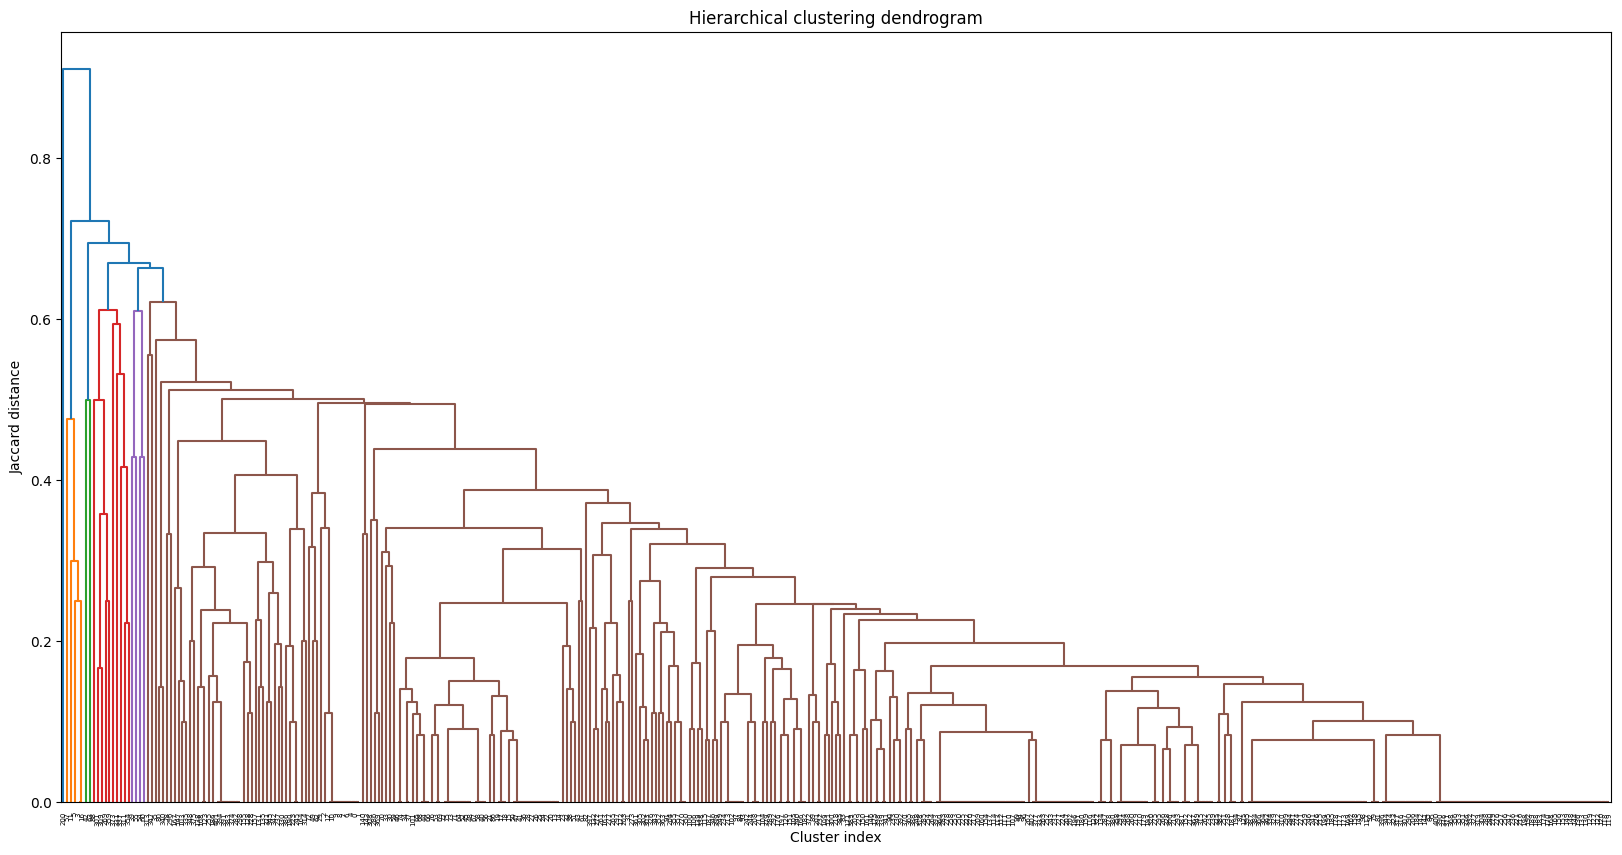

In [39]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

D_condensed = squareform(D, checks=False)
Z = linkage(D_condensed, method="average")

plt.figure(figsize=(20, 10))
_ = dendrogram(Z)

plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Cluster index")
plt.ylabel("Jaccard distance")
plt.show()

**Use silhouette score to select the number of clusters(k)**

In [40]:
from sklearn.metrics import silhouette_score
import numpy as np

scores = {}
for k in range(2, 9):
    labels = fcluster(Z, t=k, criterion="maxclust")
    scores[k] = silhouette_score(D, labels, metric="precomputed")

scores

{2: np.float64(0.597944453272948),
 3: np.float64(0.49823077481597006),
 4: np.float64(0.47090724829334824),
 5: np.float64(0.4669162259578936),
 6: np.float64(0.455069322124949),
 7: np.float64(0.4311516981089599),
 8: np.float64(0.424071482474219)}

While k = 2 has the highest silhouette score, insights from the dendrogram suggest that k = 5 provides better separation of palette structures.

**choose k=5**

In [68]:
n_clusters = 5
bob_ross['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust').astype(str)

In [69]:
bob_ross['cluster_labels'].value_counts()

,count
cluster_labels,
4,385
3,10
1,5
2,2
5,1


The resulting cluster size are highly imbalanced, with the majority of paintings (~95%) assigned to a single dominant cluster. This suggests a canonical Bob Ross palette used across most paintings. These findings align with earlier evidence of strong co-occurrence and high Jaccard similarity across palettes.

**Use the five clusters to extract palette templates by summarizing cluster-level paint usage patterns**

In [73]:
cluster_profiles = X.copy()
cluster_profiles["cluster"] = bob_ross['cluster_labels']
template = cluster_profiles.groupby("cluster").mean()
template

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
cluster,,,,,,,,,,,,,,,,,,
1,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.400000
2,0.500000,1.000000,1.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.5,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.500000,0.100000,0.000000,0.100000,0.000000,0.000000,0.200000,0.000000,0.300000,0.8,0.600000,0.000000,0.900000,0.500000,0.900000,0.000000,0.000000,0.600000
4,0.244156,0.825974,0.137662,0.893506,0.753247,0.002597,0.748052,0.033766,0.124675,0.8,0.823377,0.301299,0.641558,0.781818,0.997403,0.948052,0.849351,0.966234
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [79]:
overall = X.mean()

def summarize_cluster(c, core_threshold=0.8, opt_threshold=0.3, sig_gap=0.25):
    p = template.loc[c].sort_values(ascending=False)

    core_paint = p[p >= core_threshold].index.tolist()
    optional_paint = p[(p >= opt_threshold) & (p < core_threshold)].index.tolist()
    signature_paint = p[(p - overall) >= sig_gap].index.tolist()
    return core_paint, optional_paint, signature_paint

for c in sorted(template.index):
    core, optional, signature = summarize_cluster(c)

    print(f"\nCluster {c} (n={(bob_ross['cluster_labels']==c).sum()}):")
    print("Core:", core)
    print("Signature:", signature)
    print("Optional (top 10):", optional[:10])


Cluster 1 (n=5):
Core: ['Van_Dyke_Brown', 'Titanium_White', 'Prussian_Blue']
Signature: ['Prussian_Blue']
Optional (top 10): ['Alizarin_Crimson']

Cluster 2 (n=2):
Core: ['Bright_Red', 'Burnt_Umber', 'Titanium_White', 'Prussian_Blue']
Signature: ['Burnt_Umber', 'Prussian_Blue']
Optional (top 10): ['Black_Gesso', 'Cadmium_Yellow', 'Midnight_Black', 'Indian_Yellow']

Cluster 3 (n=10):
Core: ['Prussian_Blue', 'Titanium_White', 'Midnight_Black']
Signature: []
Optional (top 10): ['Alizarin_Crimson', 'Phthalo_Blue', 'Black_Gesso', 'Sap_Green', 'Liquid_Clear']

Cluster 4 (n=385):
Core: ['Titanium_White', 'Alizarin_Crimson', 'Van_Dyke_Brown', 'Cadmium_Yellow', 'Yellow_Ochre', 'Bright_Red', 'Phthalo_Blue', 'Midnight_Black']
Signature: []
Optional (top 10): ['Sap_Green', 'Dark_Sienna', 'Indian_Yellow', 'Prussian_Blue', 'Phthalo_Green']

Cluster 5 (n=1):
Core: ['Van_Dyke_Brown']
Signature: []
Optional (top 10): []


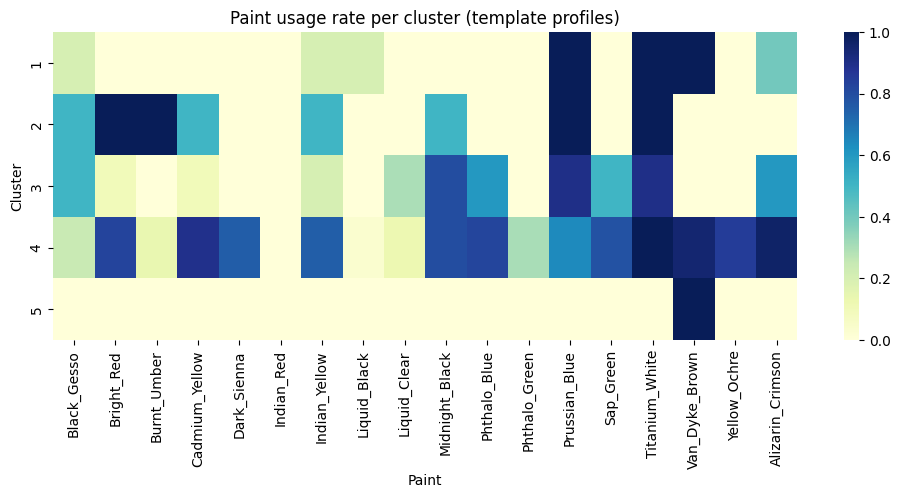

In [81]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.heatmap(template, cmap="YlGnBu")
plt.title("Paint usage rate per cluster (template profiles)")
plt.xlabel("Paint")
plt.ylabel("Cluster")
plt.show()
